In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [3]:
# Import data and display first 5 rows
features = pd.read_csv('Fraud_check.csv')
features.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
features.info() #getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
print('The shape of our features is:', features.shape)

The shape of our features is: (600, 6)


In [6]:
features.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
#Creating dummy vairables dropping first dummy variable
df = pd.get_dummies(features,columns=['Undergrad','Urban'], drop_first=True)

In [9]:
print(df.head())

  Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0         Single           68833            50047               10   
1       Divorced           33700           134075               18   
2        Married           36925           160205               30   
3         Single           50190           193264               15   
4        Married           81002            27533               28   

   Undergrad_YES  Urban_YES  
0              0          1  
1              1          1  
2              0          1  
3              1          1  
4              0          0  


In [10]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [11]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [12]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1,'Divorced':2,'Married':3})

In [13]:
print(df.head())

   Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0               1           68833            50047               10   
1               2           33700           134075               18   
2               3           36925           160205               30   
3               1           50190           193264               15   
4               3           81002            27533               28   

   Undergrad_YES  Urban_YES  
0              0          1  
1              1          1  
2              0          1  
3              1          1  
4              0          0  


C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

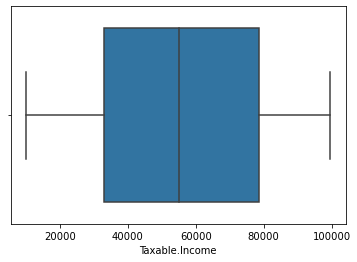

In [15]:
sns.boxplot(df['Taxable.Income'])

In [16]:
df.describe()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.961667,55208.375000,108747.368333,15.558333,0.520000,0.503333
std,0.827449,26204.827597,49850.075134,8.842147,0.500017,0.500406
min,1.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,1.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,2.000000,55074.500000,106493.500000,15.000000,1.000000,1.000000
75%,3.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000
max,3.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [17]:
df['Tax_Income'] = df['Taxable.Income'].map(lambda x: 'Risky' if x>30000 else 'Good')
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax_Income
0,1,68833,50047,10,0,1,Risky
1,2,33700,134075,18,1,1,Risky
2,3,36925,160205,30,0,1,Risky
3,1,50190,193264,15,1,1,Risky
4,3,81002,27533,28,0,0,Risky


In [19]:
df.drop(['Taxable.Income'], axis = 1, inplace = True)
df.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax_Income
0,1,50047,10,0,1,Risky
1,2,134075,18,1,1,Risky
2,3,160205,30,0,1,Risky
3,1,193264,15,1,1,Risky
4,3,27533,28,0,0,Risky


In [21]:
x=df.iloc[:,0:5]
y=df['Tax_Income']

In [22]:
x.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,1,50047,10,0,1
1,2,134075,18,1,1
2,3,160205,30,0,1
3,1,193264,15,1,1
4,3,27533,28,0,0


In [23]:
y.head()

0    Risky
1    Risky
2    Risky
3    Risky
4    Risky
Name: Tax_Income, dtype: object

In [24]:
df['Tax_Income'].unique()

array(['Risky', 'Good'], dtype=object)

In [25]:
df.Tax_Income.value_counts()

Risky    476
Good     124
Name: Tax_Income, dtype: int64

In [26]:
colnames = list(df.columns)
colnames

['Marital.Status',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Urban_YES',
 'Tax_Income']

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

### Building Decision Tree Classifier using Entropy Criteria

In [28]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

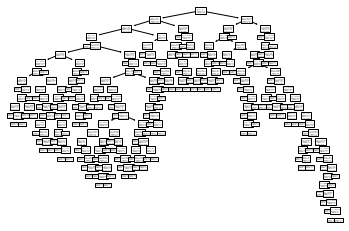

In [29]:
tree.plot_tree(model); #PLot the decision tree

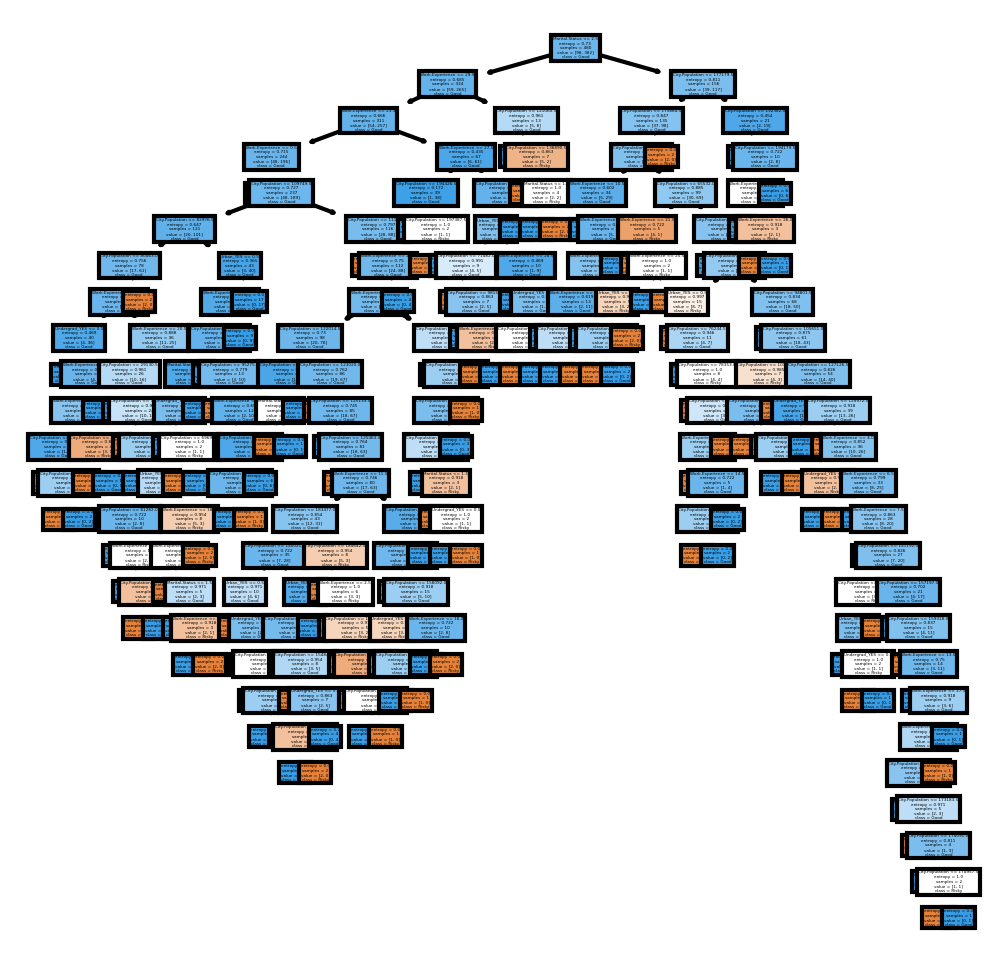

In [30]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Risky    91
Good     29
dtype: int64

In [32]:
preds

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', '

In [33]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,6,20
Risky,23,71


In [34]:
# Accuracy 
np.mean(preds==y_test)

0.6416666666666667

### Building Decision Tree Classifier using Entropy Criteria and max_depth = 3

In [35]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

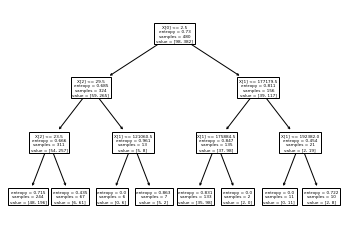

In [36]:
tree.plot_tree(model2); #PLot the decision tree

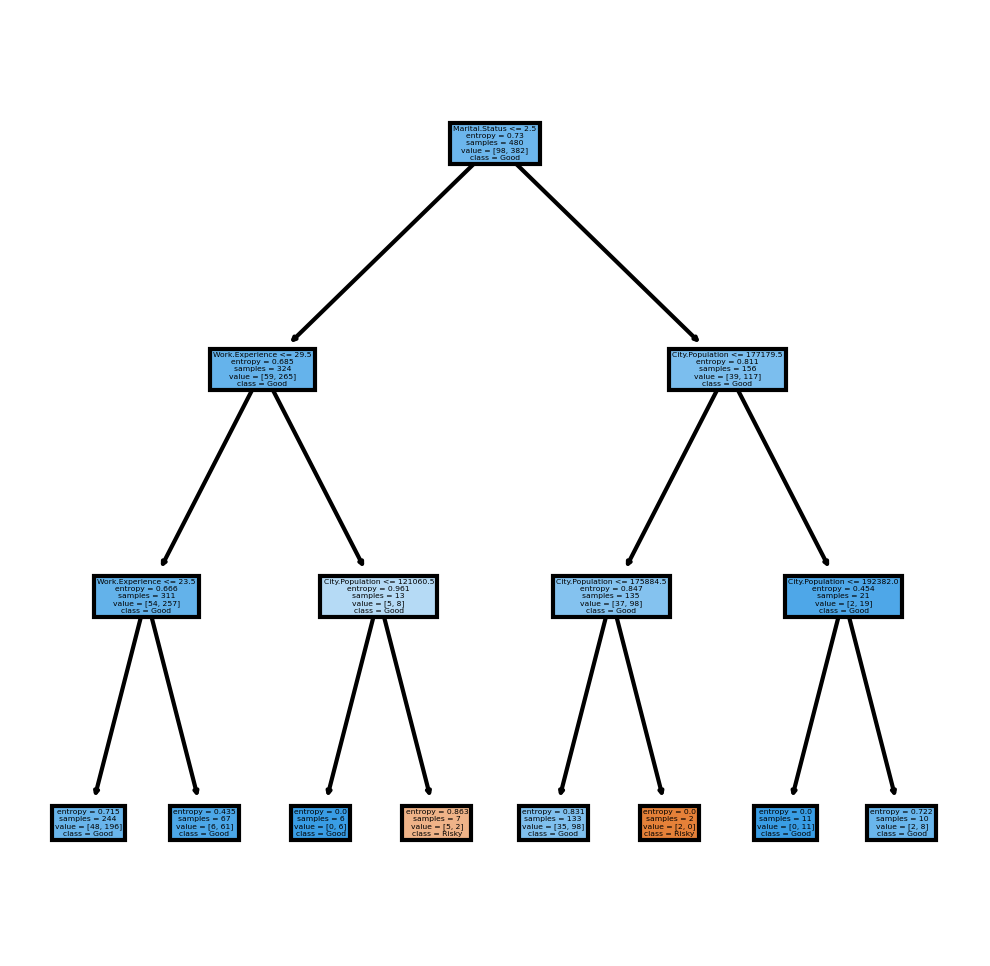

In [37]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
#Predicting on test data
preds2 = model2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Risky    91
Good     29
dtype: int64

In [39]:
preds2

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risk

In [40]:
pd.crosstab(y_test,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,0,26
Risky,1,93


In [41]:
# Accuracy 
np.mean(preds2==y_test)

0.775

### Building Decision Tree Classifier (CART) using Gini Criteria

In [42]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [43]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

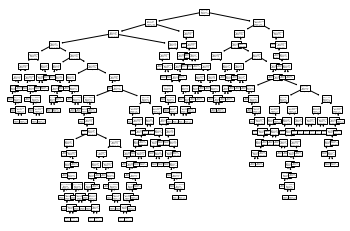

In [44]:
tree.plot_tree(model_gini); #PLot the decision tree

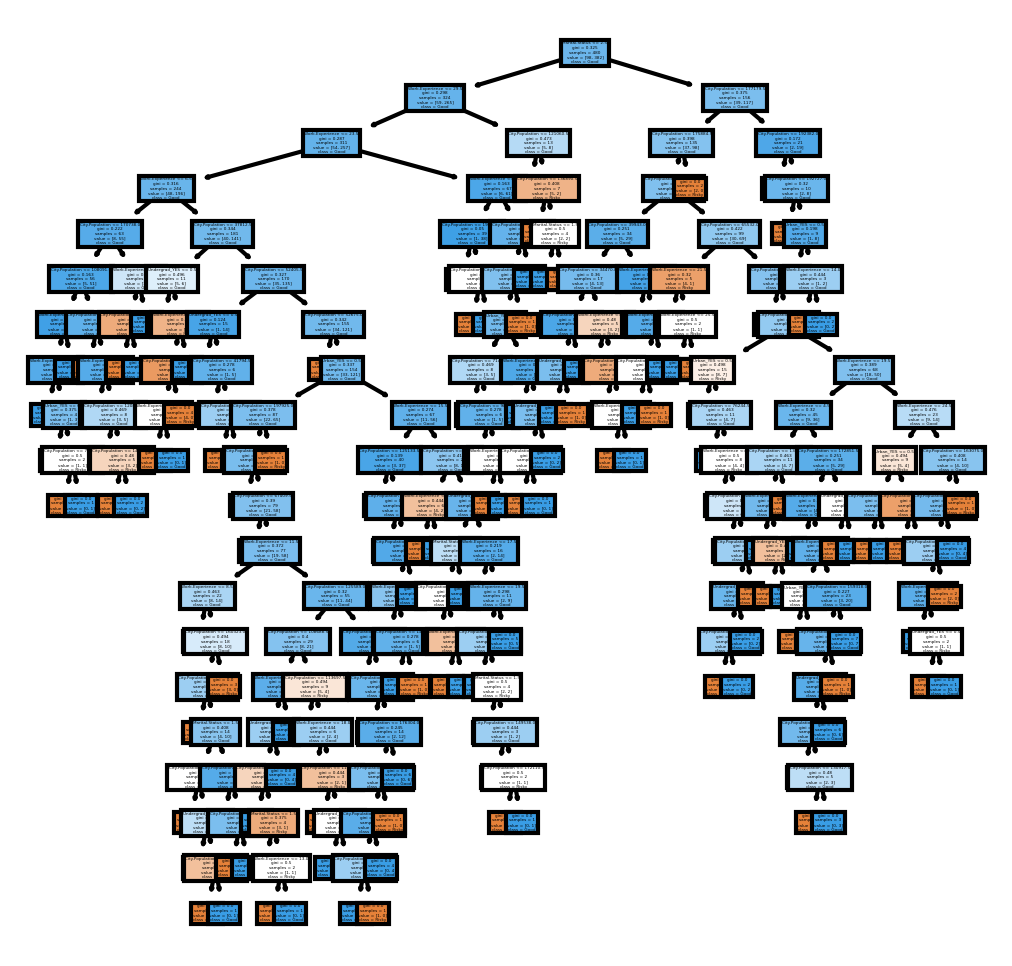

In [45]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
#Predicting on test data
pred_gini = model_gini.predict(x_test) # predicting on test data set 
pd.Series(pred_gini).value_counts() # getting the count of each category 

Risky    97
Good     23
dtype: int64

In [47]:
pred_gini

array(['Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky

In [48]:
pd.crosstab(y_test,pred_gini) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,5,21
Risky,18,76


In [49]:
# Accuracy 
np.mean(pred_gini==y_test)

0.675

### Building Decision Tree Classifier (CART) using Gini Criteria and max_depth = 3

In [50]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [51]:
model_gini2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

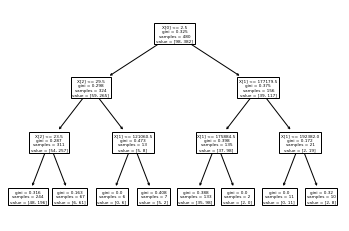

In [52]:
tree.plot_tree(model_gini2); #PLot the decision tree

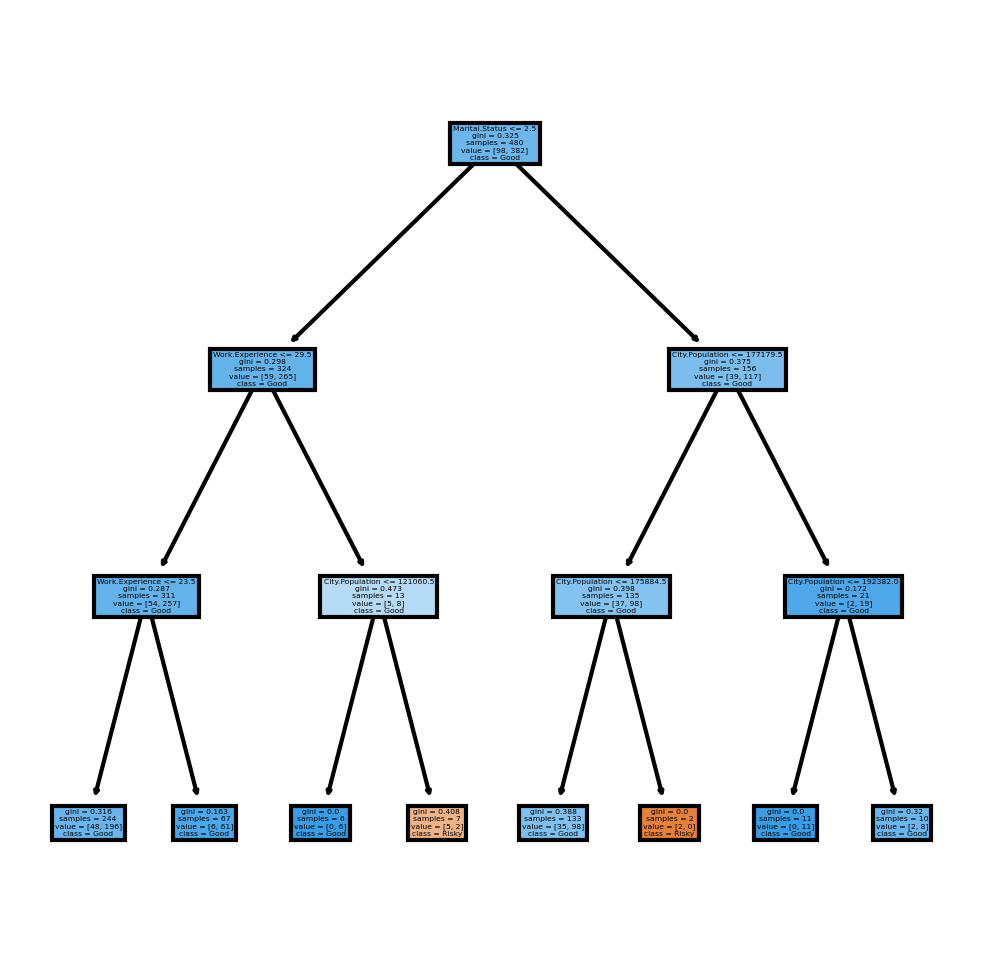

In [53]:
fn=['Marital.Status', 'City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [54]:
#Predicting on test data
pred_gini2 = model_gini2.predict(x_test) # predicting on test data set 
pd.Series(pred_gini2).value_counts() # getting the count of each category 

Risky    119
Good       1
dtype: int64

In [55]:
pred_gini2

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risk

In [56]:
pd.crosstab(y_test,pred_gini2) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_Income,,
Good,0,26
Risky,1,93


In [57]:
# Accuracy 
np.mean(pred_gini2==y_test)

0.775